In [ ]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni,materias de educacion nivel secundaria de la argentina que contenga las siguientes columnas: materia escolar,nota 1er Trimestre, nota 2do Trimestre, nota 3er trimestre, faltas a clases

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música", "Educación Ciudadana"]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Sofia", "Lucas", "Mateo", "Martina", "Emma", "Benjamín"]
  apellidos = ["Gómez", "Rodríguez", "Pérez", "López", "García", "Martínez", "González", "Sánchez", "Romero", "Fernández"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear un DataFrame vacío
df = pd.DataFrame(columns=["Apellido y Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Generar 100 filas de datos aleatorios
for i in range(100):
    nombre = generar_nombre()
    dni = np.random.randint(10000000, 99999999)  # DNI aleatorio de 8 dígitos
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)  # Nota aleatoria entre 1 y 10
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 20)  # Faltas aleatorias entre 0 y 20

    nueva_fila = pd.DataFrame({
        "Apellido y Nombre": [nombre],
        "Nro_DNI": [dni],
        "Materia Escolar": [materia],
        "Nota 1er Trimestre": [nota1],
        "Nota 2do Trimestre": [nota2],
        "Nota 3er Trimestre": [nota3],
        "Faltas a Clases": [faltas]
    })
    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))


  Apellido y Nombre   Nro_DNI     Materia Escolar Nota 1er Trimestre  \
0         Ana Gómez  74421280            Biología                  2   
1     Lucas Sánchez  70670367          Matemática                  7   
2     Sofia Sánchez  34726587            Historia                  6   
3         Ana López  39708390              Música                  9   
4      Mateo García  53780921    Educación Física                  6   
5     Martina Gómez  56637287              Inglés                  2   
6     Pedro Sánchez  80853351              Inglés                  9   
7  Martina Martínez  59451495          Matemática                  4   
8       Mateo Pérez  14275107  Ciencias Naturales                  1   
9        Emma Gómez  51445376              Física                  4   

  Nota 2do Trimestre Nota 3er Trimestre Faltas a Clases  
0                  4                  2              11  
1                  2                  2              17  
2                  5             

# Nueva sección

# Nueva sección

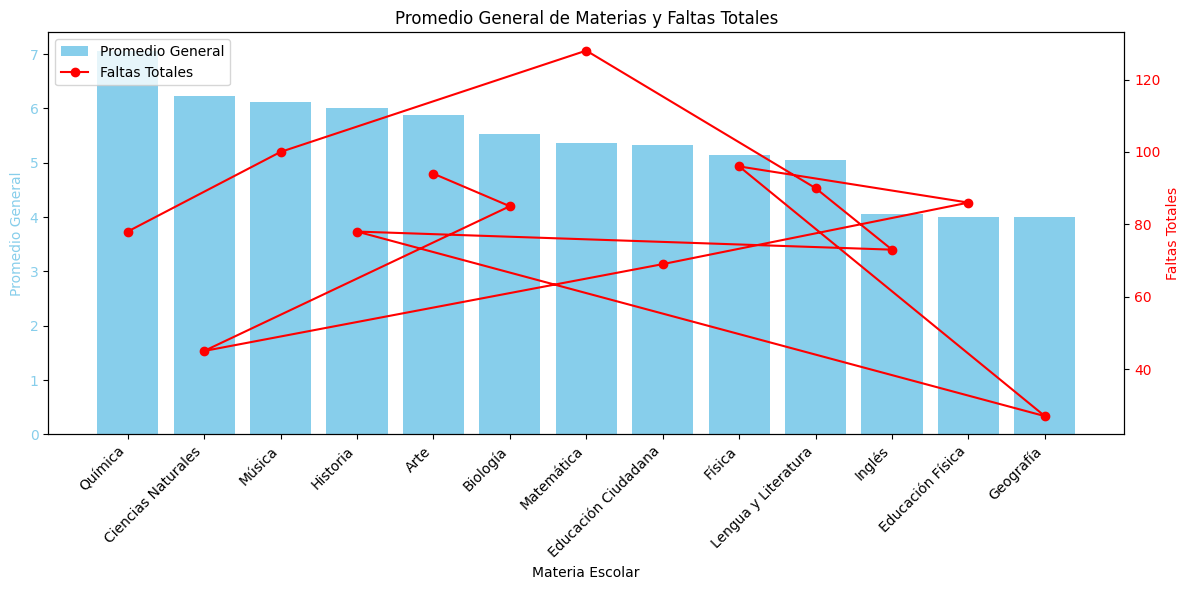

In [ ]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to create the DataFrame 'df') ...

# Calculate the average grade for each subject
average_grades = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby("Materia Escolar")["Faltas a Clases"].sum()


# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel("Materia Escolar")
ax1.set_ylabel("Promedio General", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title("Promedio General de Materias y Faltas Totales")
plt.xticks(rotation=45, ha="right")


# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel("Faltas Totales", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()